<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/Bhav_NN2_Backprop_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MNIST IMAGE DATASET CLASSIFICATION USING Multilayer Perceptron Neural Network

In [1]:
pip install tensorflow==1.4 #downgrade tensorflow to 1.4 to use function like keras placeholder

In [2]:
pip uninstall keras

Uninstalling Keras-2.3.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.3.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.3.1


In [3]:
pip install keras==2.1.5 -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 337kB 222kB/s 


In [4]:
from keras.datasets import mnist

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarn

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


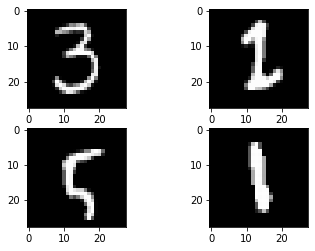

In [6]:
import matplotlib.pyplot as plt

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[50], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[70], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[100], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[200], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [7]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
#Reshape images 

x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
# Flatten the images.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

In [28]:
x_train.shape

(60000, 784)

In [29]:
x_test.shape

(10000, 784)

In [0]:
#Build Keras Perceptron Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [0]:
num_classes = 10                   #(10 digits here from 0 to 10)

In [0]:
model = Sequential()

model.add(Dense(128, input_shape=(784,), activation='relu')) #Input Layer
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu')) #Hidden Layer
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax')) #use softmax for multiclass classification, #10 = number of classes

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   #use sparse categorical croosentropy in multiclass classification when classes are as integers

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [23]:
pip install h5py

In [0]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

mc = ModelCheckpoint('best_Perceptron_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [36]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[es, mc])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.9686 - acc: 0.6860 - val_loss: 0.4621 - val_acc: 0.8675

Epoch 00001: val_loss improved from inf to 0.46206, saving model to best_Perceptron_model.h5
Epoch 2/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.4774 - acc: 0.8588 - val_loss: 0.3396 - val_acc: 0.8995

Epoch 00002: val_loss improved from 0.46206 to 0.33958, saving model to best_Perceptron_model.h5
Epoch 3/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.3806 - acc: 0.8871 - val_loss: 0.2769 - val_acc: 0.9183

Epoch 00003: val_loss improved from 0.33958 to 0.27695, saving model to best_Perceptron_model.h5
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.3227 - acc: 0.9050 - val_loss: 0.2372 - val_acc: 0.9289

Epoch 00004: val_loss improved from 0.27695 to 0.23724, saving model to best_Perceptron_model.h5
Epoch 5/20

In [0]:
from keras.models import load_model

saved_model = load_model('best_Perceptron_model.h5')

In [38]:
test_accuracy = saved_model.evaluate(x_test, y_test, verbose=0)

print("Test accuracy: %3f=", test_accuracy)

Test accuracy: %3f= [0.09819080922873691, 0.9718]


In [0]:
#Validation Accuracy = 97.18%

In [46]:
#Testing trained Multilayer Perceptron Model on a new test image no. 432 


img = x_test[435]
test_img = img.reshape((-1, 784))
img_class = saved_model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

Class:  8


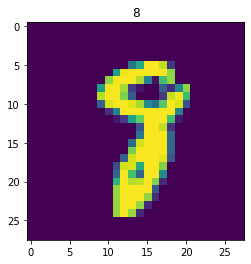

In [47]:
#Display the predicted image

img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

##Implement Multilayer Perceptron on XOR gate

In [0]:
import pandas as pd
data = { 'x1': [0,0,1,0,1,1,0],
         'x2': [0,1,0,1,0,1,0],
         'x3': [1,1,1,0,0,1,0],
         'y':  [0,1,1,1,1,0,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [157]:
df.head(10)

,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,0,1,0,1
4,1,0,0,1
5,1,1,1,0
6,0,0,0,0


In [0]:
target = 'y'

X_features = df.drop(columns = [target])

numeric_features = X_features.select_dtypes(include='number').columns.tolist()

In [0]:
X = df[numeric_features]

In [0]:
import numpy as np
X = np.array(X)

In [161]:
X.shape

(7, 3)

In [162]:
X.shape[1] #input_dimension for first layer

3

In [0]:
y = df[target]

In [0]:
y = np.array(y)

In [165]:
y.shape

(7,)

In [0]:
#Normalizing data is not needed in this case

###Implement Neural Network Structure

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [0]:

model = Sequential()

model.add(Dense(3, input_shape=(3,), activation='relu')) #Input Layer
#model.add(Dropout(0.2))

model.add(Dense(4, activation='relu')) #Hidden Layer
#model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid')) #use sigmoid for binary classification, 

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   #use binary crossentropy and accuracy here

In [169]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_49 (Dense)             (None, 4)                 16        
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1)

In [173]:
model.fit(X, y, epochs=10000, callbacks=[es])

Epoch 1/10000
7/7 [==============================] - 0s 436us/step - loss: 0.6939 - acc: 0.4286
Epoch 2/10000
7/7 [==============================] - 0s 398us/step - loss: 0.6938 - acc: 0.4286
Epoch 3/10000
7/7 [==============================] - 0s 338us/step - loss: 0.6937 - acc: 0.4286
Epoch 4/10000
7/7 [==============================] - 0s 353us/step - loss: 0.6936 - acc: 0.4286
Epoch 5/10000
7/7 [==============================] - 0s 334us/step - loss: 0.6935 - acc: 0.4286
Epoch 6/10000
7/7 [==============================] - 0s 431us/step - loss: 0.6934 - acc: 0.2857
Epoch 7/10000
7/7 [==============================] - 0s 363us/step - loss: 0.6933 - acc: 0.4286
Epoch 8/10000
7/7 [==============================] - 0s 340us/step - loss: 0.6932 - acc: 0.5714
Epoch 9/10000
7/7 [==============================] - 0s 352us/step - loss: 0.6931 - acc: 0.5714
Epoch 10/10000
7/7 [==============================] - 0s 337us/step - loss: 0.6930 - acc: 0.5714
Epoch 11/10000
7/7 [===================

In [0]:
#XOR is a polynomial probelm where usually neural netowrks don't perform well
#However, the Perceptron was able to learn and fit after multiple iterations and got accuracy of 100% on the XOR gate data.

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?